In [1]:
#initialization
from qiskit import Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.providers.ibmq.job import job_monitor
import enum
# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
#Define enum for different gates.
class gateEnum(enum.Enum):
    NOT = 1
    AND = 2
    NAND = 3
    OR = 4
    NOR = 5
    XOR = 6
    XNOR = 7

In [3]:
Qreg = QuantumRegister(3)
Creg = ClassicalRegister(30)
qc = QuantumCircuit(Qreg, Creg)

In [4]:
def NOT(qc):
    qc.x(0)
    return qc

def AND(qc):
    qc.ccx(0,1,2)
    return qc

def OR(qc):
    qc = AND(qc)
    qc.cx(0,2)
    qc.cx(1,2)
    return qc

def NAND(qc):
    qc = AND(qc)
    qc.x(2)
    return qc

def NOR(qc):
    qc = OR(qc)
    qc.x(2)
    return qc

def XOR(qc):
    qc.cx(0,2)
    qc.cx(1,2)
    return qc

def XNOR(qc):
    qc.cx(0,2)
    qc.cx(1,2)
    qc.x(2)
    return qc

In [5]:
#Set the backend simulator, assemble the quantum circuit and submit it.
def output(qc):
    # Get the quantum simulator backend
    aer_sim = Aer.get_backend('qasm_simulator')    
    # Assemble the quantum circuit into an object (Quantum Object)
    qobj = assemble(qc)
    # Run the circuit on the simulator and get the result
    res = aer_sim.run(qobj).result()
    # Extract the measurement counts (frequency of results)
    count = res.get_counts()
    return count

In [12]:
gate = gateEnum(2).name
gate

'AND'

In [13]:
Qreg = QuantumRegister(3)
Creg = ClassicalRegister(0)
qc = QuantumCircuit(Qreg)

In [14]:
qc.h(0)
qc.h(1)
#qc.x(0)
#qc.x(1)
qc.barrier()

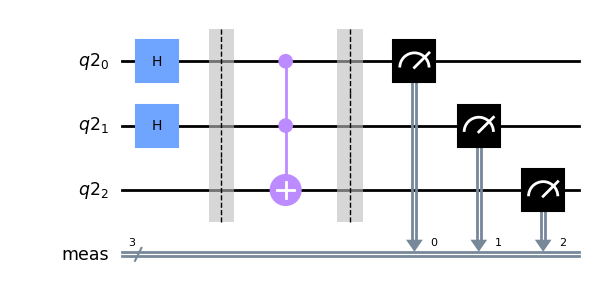

In [15]:
if gate == 'NOT':
    #qc.measure(0, 0)
    qc = NOT(qc)
    qc.measure_all()
elif gate == 'AND':
    qc = AND(qc)
    qc.measure_all()
elif gate == 'NAND':
    qc = NAND(qc)
    qc.measure_all()
elif gate == 'OR':
    qc = OR(qc)
    qc.measure_all()
elif gate == 'NOR':
    qc = NOR(qc)
    qc.measure_all()
elif gate == 'XOR':
    qc = XOR(qc)
    qc.measure_all()
else:
    qc = XNOR(qc)
    qc.measure_all()
    
style = {'fontsize':10}
qc.draw(output='mpl', style=style, reverse_bits=False)

In [16]:
count = output(qc)

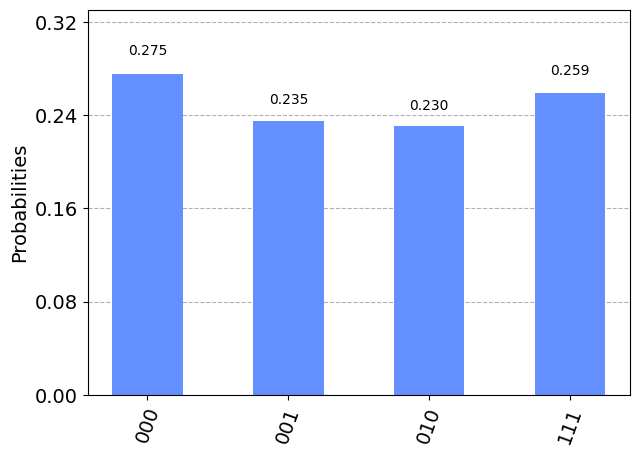

In [17]:
#Plot the output.
plot_histogram(count)

## On Real IBM quantum device

In [ ]:
#This Below block of code will check for the least busy quantum processor.
# Load the IBMQ account (this must be done before accessing IBM Quantum devices)
provider = IBMQ.load_account()

# Get the specific IBMQ provider (IBM provides different hubs, groups, and projects)
provider = IBMQ.get_provider("ibm-q")

# Find the least busy quantum processor that meets the following conditions: # - Has at least 3 qubits 
# - Is not a simulator (must be a real quantum device) 
# - Is currently operational (available for running jobs)
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and
not x.configuration().simulator and x.status().operational==True))

print("Find the least busy processor: ", device)

In [ ]:
# Import job_monitor to track the execution status of a quantum job
from qiskit.tools.monitor import job_monitor
# Transpile (optimize) the quantum circuit for the selected quantum device 
# - `qc`: The quantum circuit to be transpiled 
# - `device`: The selected IBM Quantum device to run the circuit on 
# - `optimization_level=3`: Maximum optimization level to increase accuracy and reduce execution time, at the expense of longer transpilation time.
transpiled_circuit = transpile(qc, device, optimization_level=3)

In [ ]:
# Retrieve the results of the executed quantum job
results = job.result()
# Extract the measurement counts from the results 
# - This returns a dictionary where keys are measured bitstrings (e.g., '00', '01', '10', '11') 
# - Values are the number of times each bitstring was observed
answer = results.get_counts(qc)
# Plot a histogram of the measurement results to visualize the output distribution
plot_histogram(answer)